In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("/content/heart_disease.xlsx", sheet_name = "Heart_disease")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


# ***PERFORMING EDA***

# ***OUTLIER DETECTION AND TREATMENT***

<Axes: >

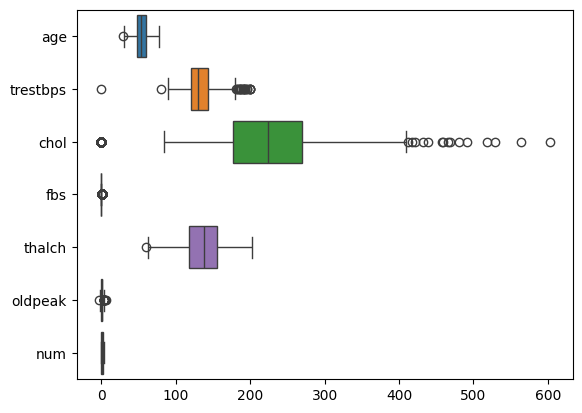

In [ ]:
#to check whether if outliers are present in the dataset or not

import seaborn as sns
sns.boxplot(data, orient = "h")

**As we can see there are so many outliers present in the dataset so we cant remove all of them, instead we could replace them with upper and lower limit**

In [ ]:
# Calculate the interquartile range (IQR)
IQR = np.percentile(data['trestbps'], 75) - np.percentile(data['trestbps'], 25)

# Calculate the upper and lower limits
upper_limit = np.percentile(data['trestbps'], 75) + 1.5 * IQR
lower_limit = np.percentile(data['trestbps'], 25) - 1.5 * IQR

# Replace outliers with the upper and lower limits
data['trestbps'] = np.where(data['trestbps'] > upper_limit, upper_limit,
                           np.where(data['trestbps'] < lower_limit, lower_limit, data['trestbps']))


In [ ]:

# Calculate the interquartile range (IQR)
IQR = np.percentile(data['chol'], 75) - np.percentile(data['chol'], 25)

# Calculate the upper and lower limits
upper_limit = np.percentile(data['chol'], 75) + 1.5 * IQR
lower_limit = np.percentile(data['chol'], 25) - 1.5 * IQR

# Replace outliers with the upper and lower limits
data['chol'] = np.where(data['chol'] > upper_limit, upper_limit,
                           np.where(data['chol'] < lower_limit, lower_limit, data['chol']))


In [ ]:
# removing outliers from thalch and oldpeak

# Remove outliers from thalch
IQR = np.percentile(data['thalch'], 75) - np.percentile(data['thalch'], 25)
upper_limit = np.percentile(data['thalch'], 75) + 1.5 * IQR
lower_limit = np.percentile(data['thalch'], 25) - 1.5 * IQR
data['thalch'] = np.where(data['thalch'] > upper_limit, upper_limit,
                           np.where(data['thalch'] < lower_limit, lower_limit, data['thalch']))

# Remove outliers from oldpeak
IQR = np.percentile(data['oldpeak'], 75) - np.percentile(data['oldpeak'], 25)
upper_limit = np.percentile(data['oldpeak'], 75) + 1.5 * IQR
lower_limit = np.percentile(data['oldpeak'], 25) - 1.5 * IQR
data['oldpeak'] = np.where(data['oldpeak'] > lower_limit, upper_limit,
                           np.where(data['oldpeak'] < upper_limit, lower_limit, data['oldpeak']))



<Axes: >

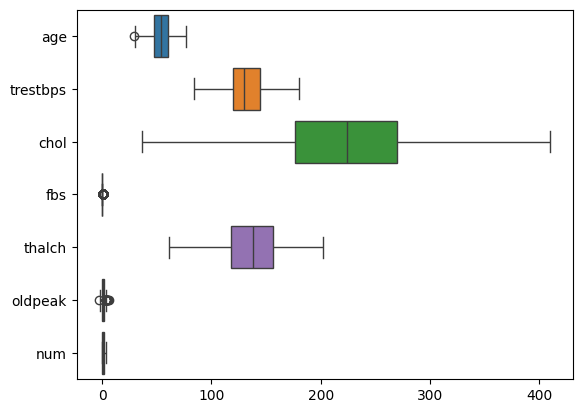

In [ ]:
sns.boxplot(data, orient = "h")

In [ ]:
data.shape

(908, 13)

In [ ]:
# correlation metrics

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000  0.052194 -0.067589  0.262042 -0.092398  0.176702   
sex       0.052194  1.000000 -0.125130  0.019198 -0.194489  0.092167   
cp       -0.067589 -0.125130  1.000000  0.012528  0.061485 -0.045228   
trestbps  0.262042  0.019198  0.012528  1.000000  0.126479  0.112497   
chol     -0.092398 -0.194489  0.061485  0.126479  1.000000 -0.112116   
fbs       0.176702  0.092167 -0.045228  0.112497 -0.112116  1.000000   
restecg  -0.007518  0.078158 -0.072048  0.057852 -0.193553  0.067320   
thalch   -0.328139 -0.178794  0.248206 -0.131777  0.194575 -0.065456   
exang     0.154966  0.161403 -0.358294  0.104120 -0.029156  0.000591   
oldpeak   0.242662  0.102397 -0.178388  0.175324  0.033850  0.024365   
slope    -0.054644 -0.045065  0.092177  0.009184  0.048489 -0.026636   
thal      0.058691  0.068439 -0.080093  0.064021 -0.015627 -0.017255   
num       0.326493  0.259605 -0.312848  0.142645 -0.228308  0.15

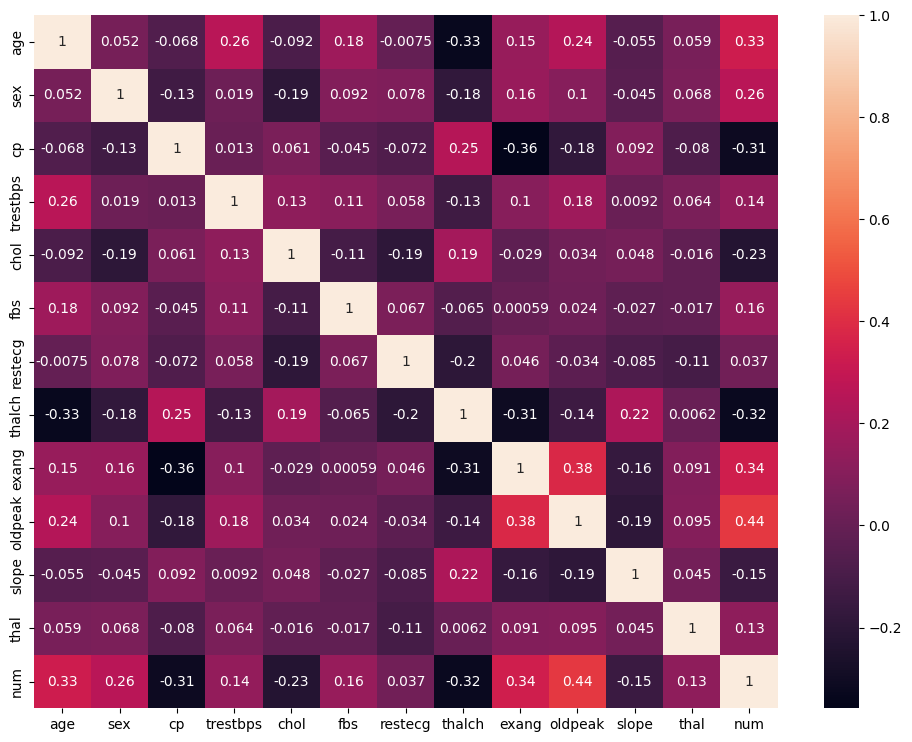

In [ ]:
#heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix,  annot=True )
plt.show()


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  data[col] = data[col].astype(str)
  data[col] = le.fit_transform(data[col])

**3. Feature Engineering:**

In [ ]:
data.info()

In [ ]:
#as data is positively skewed in oldpeak so we will replace the missing values from meadian
data['oldpeak'].fillna(data['oldpeak'].median(), inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int64  
 2   cp        908 non-null    int64  
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    int64  
 6   restecg   908 non-null    int64  
 7   thalch    908 non-null    float64
 8   exang     908 non-null    int64  
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    int64  
 11  thal      908 non-null    int64  
 12  num       908 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 92.3 KB


In [ ]:
#applying standard scaler on given dataset excluding num column

import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler to the data, excluding the 'num' column
scaler.fit(data.drop('num', axis=1))

# Transform the data, excluding the 'num' column
data_scaled = scaler.transform(data.drop('num', axis=1))

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.drop('num', axis=1).columns)


In [ ]:
data_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006027,0.514416,2.320276,0.607417,0.264845,1.976894,-1.561352,0.524203,-0.774285,1.354403,-1.672770,-1.615852
1,-1.397560,0.514416,0.232258,0.089009,-0.045006,-0.505844,0.013879,-0.147763,-0.774285,-0.815718,-0.224843,-1.615852
2,0.350503,0.514416,-0.811752,0.348213,-0.158618,-0.505844,0.013879,0.449540,-0.774285,-0.438305,-0.224843,-1.615852
3,-0.195767,0.514416,2.320276,-0.792285,-0.220589,-0.505844,-1.561352,2.017461,-0.774285,-0.815718,-0.224843,-1.615852
4,0.350503,0.514416,-0.811752,-1.207012,-0.065663,-0.505844,0.013879,-0.371752,1.260594,0.599578,-0.224843,-1.615852


# ***4. Decision Tree Classification***

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
#splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier( max_depth = 8, min_samples_leaf = 60, min_samples_split = 60)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=60, min_samples_split=60)

In [ ]:
y_pred_train = dtc.predict(x_train)
y_pred_test = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, y_pred_train))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.5702479338842975
Test Accuracy: 0.6208791208791209


# **5. Hyperparameter Tuning:**

In [ ]:
# code for hyperparameter tuning

from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_leaf': [20, 30, 40, 50, 60, 70, 80 ,90, 100],
    'min_samples_split': [20, 30, 40, 50, 60,70, 80, 90, 100]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Train the decision tree classifier with the best hyperparameters
dtc_best = DecisionTreeClassifier(**best_params)
dtc_best.fit(x_train, y_train)

# Evaluate the decision tree classifier with the best hyperparameters
y_pred_train_best = dtc_best.predict(x_train)
y_pred_test_best = dtc_best.predict(x_test)

# Print the train and test accuracy
print('Train Accuracy:', accuracy_score(y_train, y_pred_train_best))
print('Test Accuracy:', accuracy_score(y_test, y_pred_test_best))


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}
Train Accuracy: 0.6005509641873278
Test Accuracy: 0.6043956043956044


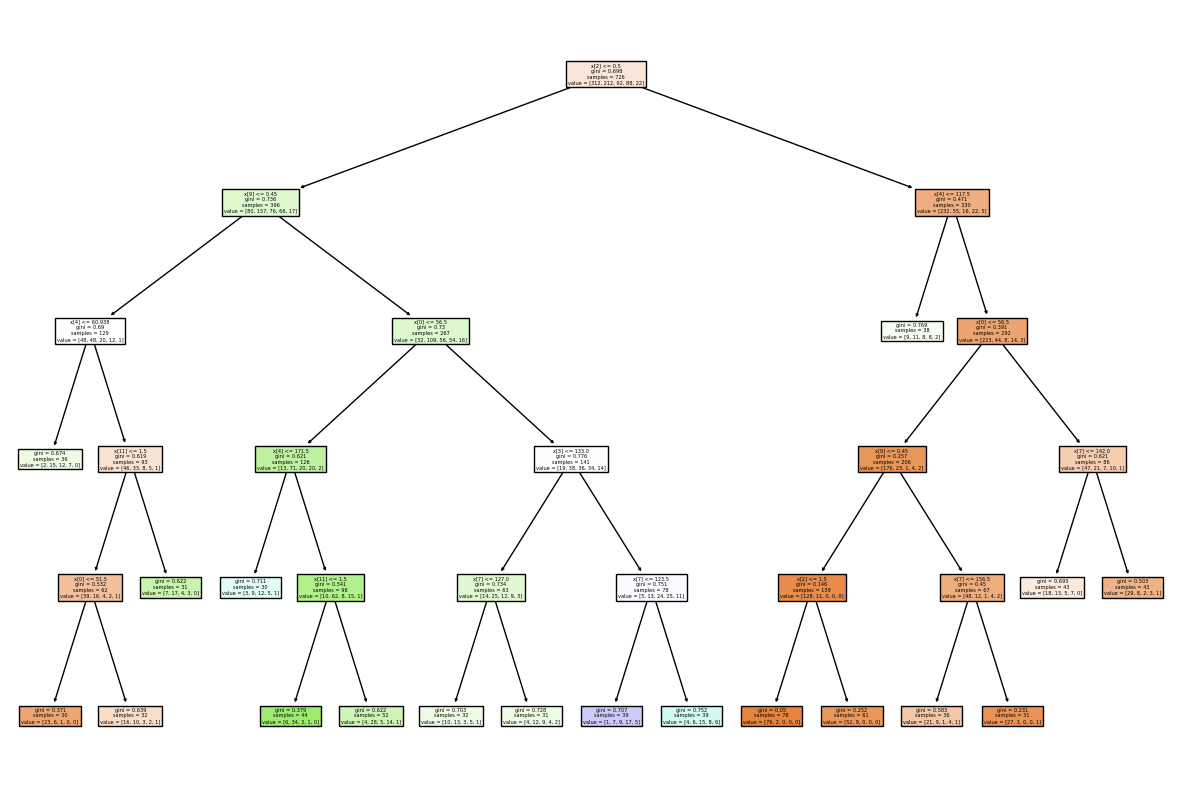

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_best, filled=True)
plt.show()


# **6. Model Evaluation and Analysis:**

In [ ]:

# Get feature importances
importances = dtc_best.feature_importances_

feature_importances = pd.DataFrame({'Feature': data.drop('num', axis=1).columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

print(feature_importances)


     Feature  Importance
2         cp    0.466657
4       chol    0.184885
0        age    0.125688
9    oldpeak    0.074055
11      thal    0.061977
7     thalch    0.051744
3   trestbps    0.034994
1        sex    0.000000
5        fbs    0.000000
6    restecg    0.000000
8      exang    0.000000
10     slope    0.000000


In [ ]:
# REMOVING THE FEATURES WITH 0 IMPORTANCE

importances = dtc_best.feature_importances_
feature_importances = pd.DataFrame({'Feature': data.drop('num', axis=1).columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
zero_importance_features = feature_importances[feature_importances['Importance'] == 0]['Feature'].tolist()
data_reduced = data.drop(zero_importance_features, axis=1)

# Split the reduced data into training and test sets
x_reduced = data_reduced.iloc[:, :-1].values
y_reduced = data_reduced.iloc[:, -1].values
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y_reduced, test_size=0.2, random_state=20)

# Train the decision tree classifier with the reduced data
dtc_reduced = DecisionTreeClassifier(**best_params)
dtc_reduced.fit(x_train_reduced, y_train_reduced)

# Evaluate the decision tree classifier with the reduced data
y_pred_train_reduced = dtc_reduced.predict(x_train_reduced)
y_pred_test_reduced = dtc_reduced.predict(x_test_reduced)

# Print the train and test accuracy
print('Train Accuracy (Reduced Data):', accuracy_score(y_train_reduced, y_pred_train_reduced))
print('Test Accuracy (Reduced Data):', accuracy_score(y_test_reduced, y_pred_test_reduced))


Train Accuracy (Reduced Data): 0.6005509641873278
Test Accuracy (Reduced Data): 0.6043956043956044


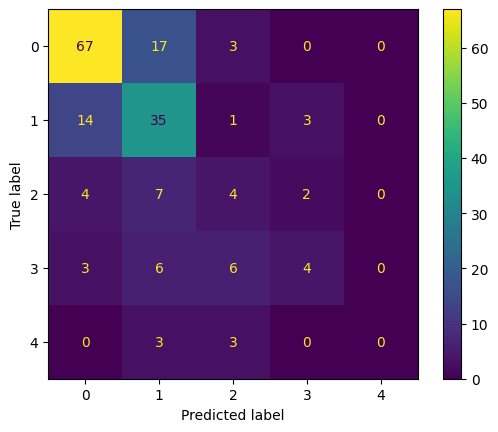

In [ ]:


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**The accuracy even after feature important is same, 60%.**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

1. Criteria : The quality of the split in the decision tree is measured by the function called criteria. The criteria support two types such as gini (Gini impurity) and entropy (information gain).

    Gini index – Gini impurity or Gini index is the measure that parts the probability distributions of the target attribute’s values. It splits the node in a way that yields the least amount of impurity.

    Information gain – It is an impurity measure that uses the entropy measure to spilt a node in a way that it yields the most amount of information gain.



2. max_depth: As the name suggests, max_depth hyperparameter controls the maximum depth to which the decision tree is allowed to grow.
    When the max_depth is deeper it allows the tree to capture more complex patterns in the training data potentially reducing the training error.

    However, setting max_depth too high can lead to overfitting where the model memorizes the noise in the training data.

    It is very important to tune max_depth carefully to find the right balance between model complexity and generalization performance.


3. min_samples_split: The min_sample_split hyperparameter defines the minimal number of samples that are needed to split a node. It should be noted that the min_samples_split works as a threshold to split a node in a decision tree, if the number of samples in a node is less than min_samples_split, the node will not be split and it will turn into a leaf node.

    The input option for min_samples_split can be an integer that indicates the minimum number of samples necessary in an internal node or it can be a fraction that indicates the minimum percentage of samples needed in an internal node. Example: min_samples_split = 10 ensures a node must have at least 10 samples before splitting.


4. min_samples_leaf: The min_samples_leaf hyperparameter defines the required minimal amount of samples to be present at a leaf node.
    
    It acts as a threshold for halting the splitting process and designating a node as a leaf. The condition for splitting is that it must leave at least min_samples_leaf samples on both resulting child nodes, this ensures that the splitting process doesn’t continue indefinitely. The input option for min_samples_leaf can either be an integer or float.


5. max_features: The max_features hyperparameter allow us to control the number of features to be considered when looking for the best split in the decision tree.
   
    It can either define an exact number of features to consider at each split or as a percentage that represents the proportion of features to consider. The input options can be an integer, float, auto, sqrt, log2.

**2. What is the difference between Label Encoding and One-hot Encoding?**

*LABEL ENCODING*


Imagine you have data of the customer feedback form. You might have Poor, Fair, Good, Very Good, and Excellent. Now, you want to use a computer to work with this list. Computers prefer numbers over words, so how can we represent these feedback categories using numbers? This is where Label Encoding comes in.


Label Encoding assigns a unique number to each category. In our example, we could assign the number 1 to Poor, 2 to Fair, and so on. So, your list of customer feedback would become [1, 2, 3,4,5].

Let’s look at a simple Python code example to see how this works:


Label Encoding is great when you have categories with an inherent order or rank, like ‘low,’ ‘medium,’ and ‘high’ in a survey response. However, it has a drawback when used for nominal categories, such as colors, because it can imply an unintended order.


*ONE HOT ENCODING*

One-Hot Encoding is another technique to convert categorical data into a numerical form. Instead of giving each category a single number, it creates a new binary column (1 or 0) for each category.


Let’s go back to our fruits example. Instead of assigning numbers, One-Hot Encoding would create three new columns: Apple and Pear. For each row in your data, if a fruit is ‘apples,’ the ‘apples’ column gets a 1, and the other column get 0.

Here’s how you can do One-Hot Encoding in Python:


In this code, we use the get_dummies function from the pandas library to perform One-Hot Encoding.
One-Hot Encoding is suitable for nominal data, like colors or car brands, where there is no inherent order. It ensures that the machine understands that each category is unique.
